In [ ]:
# 선형회귀는 저차원 데이터(특성의 갯수가 적으면)에서는 성능이 좋지 않지만,
# 고차원 데이터(특성의 갯수가 많을수록)에서는 성능이 매우 좋고 속도가 빠르다는 장점을 가진다.

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown OS')

D:\Bigdata2020\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Bigdata2020\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


w[0]: 0.393906  b: -0.031804


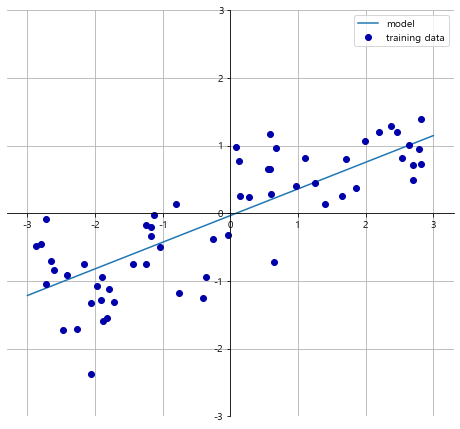

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 저차원 데이터
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train) # lr = LinearRegression() 모델 객체 만들고, lr.fit(X_train, y_train) 훈련

In [6]:
print("lr의 계수(weight 또는 coefficient): {}".format(lr.coef_))
print("lr의 편향(offset 또는 intercept): {}".format(lr.intercept_))

# 여기서 coef는 numpy배열형태이고, intercept는 float(실수) 값.
# coef는 각 특성에 부여되는 가중치들의 배열이고, intercept 값은 그 가중치에 대한 조정값이기 때문.
# wave 데이터 셋은 입력 특성이 하나밖에 없기 때문에 배열의 길이도 1임.

lr의 계수(weight 또는 coefficient): [0.39390555]
lr의 편향(offset 또는 intercept): -0.031804343026759746


In [7]:
# Score
print("훈련세트 점수: {}".format(lr.score(X_train, y_train)))
print("테스트세트 점수: {}".format(lr.score(X_test, y_test)))

# 회귀에서 score는 R^2(결정계수)임.
# Linear Regression모델을 훈련시킨 점수를 확인해보니 R^2 값이 66%정도로 별로 좋지 않음.
# 훈련세트의 점수와 테스트세트 점수가 거의 비슷한데 -> 과소적합상태를 의미
# 그리고 wave 데이터셋은 특성이 하나뿐인 1차원 데이터 셋이기 때문에 과대적합을 걱정할 필요가 없음.

훈련세트 점수: 0.6700890315075756
테스트세트 점수: 0.65933685968637


In [8]:
# Boston Data (고차원 데이터)
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)

print("훈련세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 여기서 테스트 결과 훈련세트의 R^2이 95%이지만, 테스트 세트 점수는 61%임.
# 이 모델은 과대적합되었다는 확실한 신호임.
# 해결방법: 1. 데이터 추가(현실적이진 않음), 2. 모델에서 복잡도를 조정(선형회귀모델에선 가중치) 
# 그래서 복잡도를 제어해서 모델을 일반화시켜야함.
# 그런데 기본 선형 회귀 방식인 Linear Regression모델로는 파라미터를 통해서 복잡도를 제어할 수 없으니,
# 여러가지 회귀 모델을 알아보자!!

# 게수가 0에 가까울수록 모델의 복잡도가 낮아지고, 계수의 값이 클수록 모델의 복잡도가 높다.
# 알파가 낮아지면 가중치가 높아진다 (모델이 민감해진다).알파가 높아지면 가중치가 0으로 가깝게 낮아진다.

훈련세트 점수: 0.95
테스트세트 점수: 0.61


In [9]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train) #Boston data
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))


훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


$\alpha$는 가중치에 대한 패널티 <br>
$\alpha$ 값은 보통 로그 스케일(100, 10, 1, 0.1, 0.01, ...) 으로 부여하는 것이 일반적임.<br>
$\alpha$ default값은 0.1임.

In [12]:
#ridge에 높은 alpha값을 부여
ridge10 = Ridge(alpha = 10)
ridge10.fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [13]:
#ridge에 낮은 alpha값을 부여
ridge01 = Ridge(alpha = 0.1)
ridge01.fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


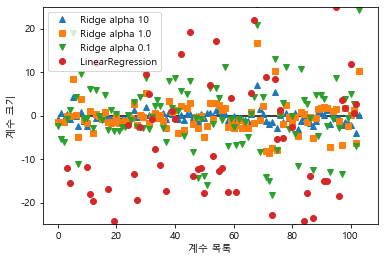

In [17]:
# alpha값에 따라서 각 모델의 coef_(가중치 값)이 어떻게 달라지는지 시각화
plt.plot(ridge10.coef_, '^', label="Ridge alpha 10")
plt.plot(ridge.coef_, 's', label="Ridge alpha 1.0")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha 0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [16]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_!=0))) # Lasso는 필요없는 특성을 0으로 만들수 있음.

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [18]:
# Ridge: 경사하강법 (미분을 통해 오차가 최소화되는 기울기를 찾음)
# Lasso: 좌표하강법 (특성 하나의 오차에 대해 좌표축을 따라 오차가 최소화되는 곳을 찾음)
# 즉 좌표하강법은 학습 과정이 여러번 진행되어야 하기 때문에 max_iter값을 지정하여
# 최소화된 오차를 계속 계산할 수 있도록 해야 함.
# alpha를 줄이게 되면 가장 낮은 오차를 찾아가는 반복횟수가 늘어남.
lasso001 = Lasso(alpha=0.01, max_iter = 100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_!=0))) # Lasso는 필요없는 특성을 0으로 만들수 있음.

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [21]:
lasso0001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lasso0001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso0001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso0001.coef_ != 0)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 : 96


Text(0, 0.5, '계수 크기')

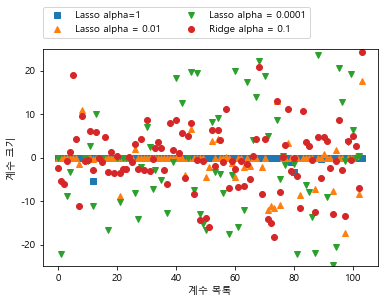

In [22]:
# alpha 값에 따른 다른 모델들의 계수 시각화
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")